# Welcome to my Notebook

##### In this notebook, I'm going to analyse what properties a Stimuli must possess to elicit a humorous response.   

  
  
#####  This analysis forms part of my bachelor's thesis project, which I'm currently completing under guidance of Dr. Paulun and Prof. Fleming, Ph.D. of the General psychology lab of the Justus-Liebig-Universität Giessen.  
##### [Click here to learn more about the lab.](https://www.uni-giessen.de/fbz/fb06/psychologie/abt/allgemeine-psychologie)

##### The data was experimentally collected for my project.  
##### In the experiment, the participants saw scenes and had to rate them on various scales. Each scene focused on a blue object, which interacted in different ways with its surrounding. 

##### The participants had to rate on a scale of 0 to 1:

##### - How `funny` the Stimulus is
##### - How `happy` the object is
##### - How `surprising` the scene appears
##### - How `abrupt` the movement of the object is
##### - How `typical` the object behaves
##### - How `predictable` the scene is in total
##### - How `wobbly` the object appears
##### - How `droopy` the object appears

##### In the following, I want to analyse, which of these scales turn out useful in predicting if a scene is gonna be accessed as funny.



##### Note: This analysis is just an excerpt of my work. 

##### First import relevant libaries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = 'white', color_codes = False)
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

%matplotlib widget

##### The experiment yielded one datafile for each participants. We first load them and then merge them into one DataFrame.

In [3]:
#Access the relevant dictionary
os.chdir('/Users/julianbons/Desktop/Projekt/Data Raw')

#Get the relevant Data
files = os.listdir()

#vpList = []
df_data = pd.DataFrame()

#Append the individual Data to one dataframe'
for i, file in enumerate(files):
    vpCode = file[:-16]
    globals()['df_' + vpCode] = pd.read_csv(file)
    globals()['df_' + vpCode].insert(1, 'VP', vpCode)
    df_data = df_data.append(globals()['df_' + vpCode], sort=True)

#Sort the columns
df_data = df_data[df_INDR942.columns]

#Lastly get a list of the ratings for further analysis
index = list(df_data.columns[12:])

#Save it
#df_data.to_csv('/Users/julianbons/Desktop/Projekt/df_data.csv')

##### Let's take a look at the data

In [4]:
df_data.head()

,group,VP,block,trialNumber,trialType,Var5,scene,Var7,Var8,stiffness,elasticity,variation,funny,happy,surprising,abrupt,typical,predictable,wobbly,droopy
0,3.0,LARK3932,1.0,1.0,53.0,object17_high_static,NaN,object17_high,0.0,NaN,NaN,NaN,0.5175,0.5000,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,LARK3932,1.0,2.0,36.0,Teapot_static,NaN,Teapot,1.0,NaN,NaN,NaN,0.5000,0.3700,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,LARK3932,1.0,3.0,49.0,object12_high_static,NaN,object12_high,0.0,NaN,NaN,NaN,0.5000,0.5000,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,LARK3932,1.0,4.0,66.0,object34_high_static,NaN,object34_high,0.0,NaN,NaN,NaN,0.5500,0.5000,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,LARK3932,1.0,5.0,24.0,Horse_static,NaN,Horse,1.0,NaN,NaN,NaN,0.3650,0.3525,NaN,NaN,NaN,NaN,NaN,NaN


##### We can see, that there are a lot of missing values. This is due to the experimential design. Before showing the Stimuli, we presented pictures of the objects, which participants rated just on how funny and happy they seem. 

##### We will only look at the scenes in this Notebook, so we drop them.

In [5]:
df_data = df_data[df_data['block'] == 2].drop('block', axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 27 to 57
Data columns (total 19 columns):
group          1280 non-null float64
VP             1280 non-null object
trialNumber    1280 non-null float64
trialType      1280 non-null float64
Var5           1280 non-null object
scene          1280 non-null object
Var7           1280 non-null object
Var8           1280 non-null float64
stiffness      1280 non-null float64
elasticity     1280 non-null float64
variation      1280 non-null float64
funny          1280 non-null float64
happy          1280 non-null float64
surprising     1280 non-null float64
abrupt         1280 non-null float64
typical        1280 non-null float64
predictable    1280 non-null float64
wobbly         1280 non-null float64
droopy         1280 non-null float64
dtypes: float64(15), object(4)
memory usage: 200.0+ KB


##### We end up with 40 participants contributing 1280 data points.

##### Before we dive into the analysis, let's first look at our outcome variable. 

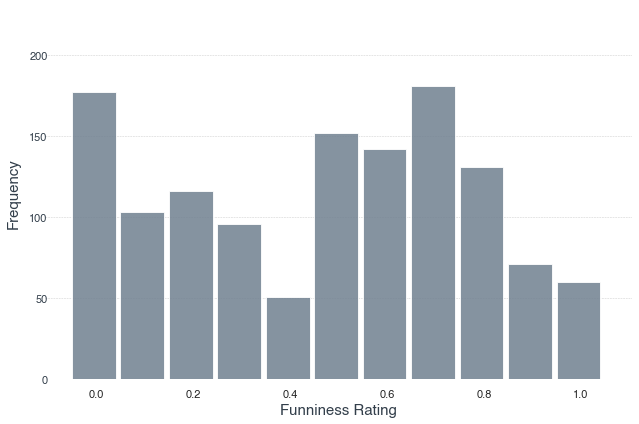

Descriptive Statistics for the funniness ratings:


count    1280.000000
mean        0.469879
std         0.302719
min         0.000000
25%         0.185000
50%         0.500000
75%         0.717500
max         1.000000
Name: funny, dtype: float64

In [6]:
# Align the bins
bins = np.arange(-0.05, 1.06, 0.1)

#Plot the figure
fig, ax = plt.subplots(figsize=(9,6))
plt.hist(df_data['funny'], bins=bins, color='slategray', alpha=0.85, width=0.09)

#Improve the appearance
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.color'] = '#333F4B'
plt.rcParams['ytick.color'] = '#333F4B'
ax.set_xlabel('Funniness Rating', fontsize=15, fontweight='black', color='#333F4B')
ax.set_ylabel('Frequency', fontsize=15, fontweight='black', color='#333F4B', labelpad=8)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.set_ylim(0, 230)
ax.yaxis.grid(linestyle='--', lw=0.5, color='black', alpha=0.2)
ax.spines['left'].set_position(('axes', 0.02))

#Save if neccessary and plot
plt.tight_layout()
#plt.savefig('Figure 1.svg', dpi=1200, format='svg')
plt.show()

print('Descriptive Statistics for the funniness ratings:')
df_data.funny.describe()

###### This histogram displays the frequency of the raw ratings.
##### We can see, that participants used the whole scale to rate the scenes. 

##### We are, however, not interested in the behavior of the individual participants. Instead we want to predict, if a scene is more likely to be perceived as funny than not. Therefore, we average the ratings for each scene and plot the new ratings. For a better sense of the consensus among participants, we also visualize the standard deviation as a shaded error surronding the mean. 

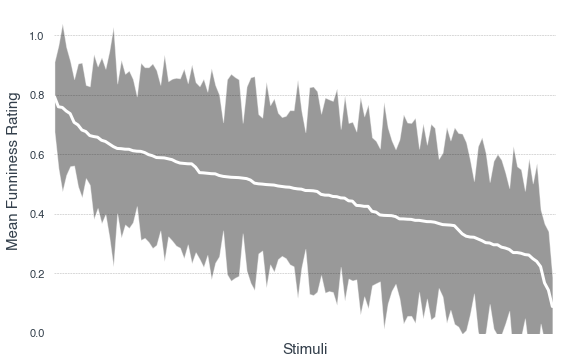

Descriptive Statistic for the average funniness rating of the scenes


count    128.000000
mean       0.469879
std        0.139802
min        0.088250
25%        0.373437
50%        0.480250
75%        0.571375
max        0.793250
Name: funnymean, dtype: float64

In [7]:
#Drop unncessary columns and aggregate the ratings for each Stimuli
df_Stimuli = df_data.drop(df_data.columns[[0, 2, 3, 6]], axis=1)
df_Stimuli = df_Stimuli.groupby(['Var5'], as_index=True).agg(['mean', 'std'])
df_Stimuli.columns = (s for s in list(map(''.join, df_Stimuli.columns.values)))

#Sort Stimuli by their mean funniness
for i in index:
    globals()['df_Stimuli_' + str(i)] = df_Stimuli.sort_values(by=[str(i) + 'mean'], ascending=False)


#Prepare the plot
x_pos = np.arange(len(df_Stimuli_funny.columns))
CTEs = df_Stimuli_funny['funnymean']
error = df_Stimuli_funny['funnystd']
top = (CTEs + error)
bottom = (CTEs - error)

#Plot the data
fig, ax = plt.subplots(figsize=(9,6))
ax.fill_between(range(len(df_Stimuli_funny)), 
                       bottom, top, 
                       facecolor='black', 
                       alpha=0.4)
ax.plot(range(len(df_Stimuli_funny)), CTEs, color='white', linewidth=3)

#Improve the design
ax.spines['top'].set_visible(False)    
ax.spines['bottom'].set_visible(False)    
ax.spines['right'].set_visible(False)    
ax.spines['left'].set_visible(False)
ax.yaxis.grid(linestyle='--', lw=0.5, color='black', alpha=0.3)
ax.yaxis.set_ticks_position('none') 
ax.set_ylim([0,None])
ax.set_xlim([-0.1, len(df_Stimuli_funny + 0.1)])
ax.set_xlabel('Stimuli', fontsize=15, fontweight='black', color='#333F4B', labelpad=10)
ax.set_ylabel('Mean Funniness Rating',  fontsize=15, fontweight='black', color='#333F4B', labelpad=8)
ax.xaxis.set_ticks_position('none') 
plt.setp(ax.get_xticklabels(), visible=False)

#Save and show the plot
#plt.savefig('Stimuli_mean.svg', format='svg', dpi=1200)
plt.show()

print('Descriptive Statistic for the average funniness rating of the scenes')
df_Stimuli.funnymean.describe()

##### We can see, that our material includes as many *funny* scenes, as scenes that are not funny. Also we can see, that consensus is low among participants, even at the end of the continuums.   
##### This should be kept in mind, when we further procced with the analysis. 

##### Next, we identify, which ratings to include in our model. We only look at the ratings here

In [8]:
#Just look at the mean ratings. Drop the SD.
df_Stimuli.iloc[:, 8: :2].corr()['funnymean']

funnymean          1.000000
happymean          0.582725
surprisingmean     0.490402
abruptmean         0.114467
typicalmean       -0.427264
predictablemean   -0.480790
wobblymean         0.480531
droopymean         0.041925
Name: funnymean, dtype: float64

##### We can see, that 
##### - `happy` 
##### - `wobbly`
##### - `surprising`
##### - `typical`
##### - `predictable`  

##### all correlate moderatly with funniness.  

##### Note: All of the correlations are significant

In [9]:
print('Correlations:')
for i in ['happymean', 'wobblymean', 'surprisingmean', 'typicalmean', 'predictablemean']:
    r, p = stats.pearsonr(df_Stimuli['funnymean'], df_Stimuli[i])
    print('For {}:      \t r = {:.2}, p = {:.3}'.format(i[:-4], r, p))

Correlations:
For happy:      	 r = 0.58, p = 5.35e-13
For wobbly:      	 r = 0.48, p = 9.44e-09
For surprising:      	 r = 0.49, p = 4.2e-09
For typical:      	 r = -0.43, p = 4.91e-07
For predictable:      	 r = -0.48, p = 9.25e-09


##### Next, we can see, that the last three ratings all share a common theme. They are *violations* of some sort. Let's see, if they also share a connection


In [10]:
df_Stimuli[['surprisingmean', 'typicalmean','predictablemean']].corr()

,surprisingmean,typicalmean,predictablemean
surprisingmean,1.000000,-0.790474,-0.847947
typicalmean,-0.790474,1.000000,0.839728
predictablemean,-0.847947,0.839728,1.000000


##### They are highly correlated. Therefore we reduct them to one common *violation factor*.

In [11]:
df_pca = df_Stimuli.copy()

#The modul automatically centers the data, we don't need to scale it since the scale is already between 0 and 1

df_pca['not_violation'] = PCA(n_components=1, random_state=1).fit_transform(df_pca[['surprisingmean', 'predictablemean', 'typicalmean']])

print('Correlations with the new factor called "not_violation":')
df_pca[['not_violation', 'surprisingmean', 'predictablemean', 'typicalmean']].corr()['not_violation']

Correlations with the new factor called "not_violation":


not_violation      1.000000
surprisingmean    -0.919890
predictablemean    0.942692
typicalmean        0.952824
Name: not_violation, dtype: float64

##### We can see, that the new factor represents the ratings quite well. Unfortunatly, he is inverted and exceeds the 0 to 1 range. 
##### We fix this using the MinMaxScaler and inversion:

In [12]:
df_pca['violation'] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_pca[['not_violation']])
df_pca['violation'] = 1 - df_pca['violation']

print('Correlations with the inverted factor called "violation":')
df_pca[['violation', 'surprisingmean', 'predictablemean', 'typicalmean']].corr()['violation']




Correlations with the inverted factor called "violation":


violation          1.000000
surprisingmean     0.919890
predictablemean   -0.942692
typicalmean       -0.952824
Name: violation, dtype: float64

##### Now, we have a violation factor to work with. 

##### Then, we use stepwise regression to see, which predictors to include in our model

In [13]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

X = df_pca.copy()
for i in X.columns:
    if 'std' in i:
        X.drop(i, axis=1, inplace=True)
X = X.drop(['funnymean', 'not_violation'], axis=1)
y = df_pca.funnymean

result = stepwise_selection(X, y)

print('resulting features:')
print(result)



Add  happymean                      with p-value 5.34838e-13
Add  violation                      with p-value 1.0127e-15
resulting features:
['happymean', 'violation']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


##### This finding is strikingly similar to the benign-violation theory. This theory assumes that, for a thing to be funny, it both must be a violation and be perceived as harmless (benign).   

#####  You can learn more about that theory by visiting [this link](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2559414).

#####  The main difference in our finding, lies in the fact that we didn't ask for the perception of the observer, but asked for the happiness of the object. It should be noted, that these to ratings probably share a connection, but are different. The benign factor also accounts for Schadenfreude, where the observer interprets the situation as harmless (for himself), while the happiness of the object does not. Often, however, the observer is influenced by the happiness of the object. Therefore, we expect funny scenes to include more often happy objects, than not. 

#####  Note also, that the `wobbly` rating disappeared. 

In [14]:
df_pca.iloc[:,8:-3:2].corr()['wobblymean']

funnymean          0.480531
happymean          0.454638
surprisingmean     0.146974
abruptmean        -0.026530
typicalmean       -0.289973
predictablemean   -0.181157
wobblymean         1.000000
droopymean         0.120706
Name: wobblymean, dtype: float64

##### This is probably due to the correlation with happiness. 

##### Let's look at our remainding predictors, starting with the violation factor

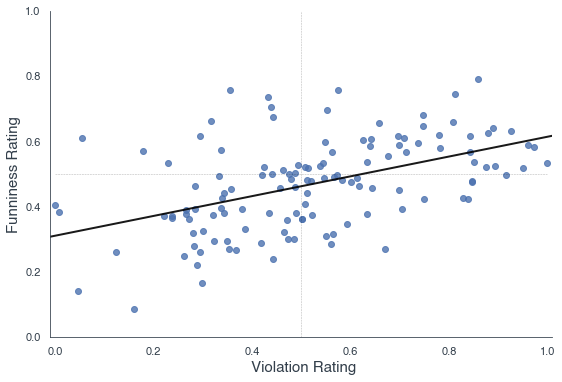

                            OLS Regression Results                            
Dep. Variable:              funnymean   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     39.58
Date:                Tue, 05 May 2020   Prob (F-statistic):           4.75e-09
Time:                        08:59:11   Log-Likelihood:                 88.206
No. Observations:                 128   AIC:                            -172.4
Df Residuals:                     126   BIC:                            -166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
violation      0.3035      0.048      6.291      0.0

In [15]:
#Construct the plot
fig, ax = plt.subplots(figsize = (9,6))

sns.regplot(x = 'violation', y = 'funnymean', ci = None, data = df_pca, line_kws = {'color': 'k', 'alpha': 0.9,'lw': 2})
ax.set_ylim(0,1)
ax.set_xlim(-0.01,1.01)
plt.vlines(x=0.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=0.5, alpha = 0.3)
plt.hlines(y=0.5, xmin=0, xmax=1, color='black', linestyle='--', linewidth=0.5, alpha = 0.3)
[ax.spines[loc].set_visible(False) for loc in ['top', 'right']]
ax.set_ylabel('Funniness Rating', fontsize = 15, fontweight='black', color = '#333F4B')
ax.set_xlabel(' Violation Rating', fontsize = 15, fontweight='black', color = '#333F4B')
#plt.savefig('Fun_sup_corr.svg', dpi = 1200, format = 'svg')
plt.show()

#Calculate the linear Regression
def linReg(df, y, X):
    """
    Takes a dataframe, the string of the outcome and the string of the predictor
    Outputs a linear Regression
    """
    df['intercept'] = 1
    lm = sm.OLS(df[y], df[[X] + ['intercept']])
    slr_results = lm.fit()
    print(slr_results.summary())
    
linReg(df_pca, 'funnymean', 'violation')

##### We can see, that the with increasing violation, more and more scenes are rated as funny. Due to our scaling, we consider a rating of 0.5 and higher as 'funny'. We can further see, that most of the funny Stimuli have a violation rating of 0.5 or higher.

##### Let's look at the happy ratings next

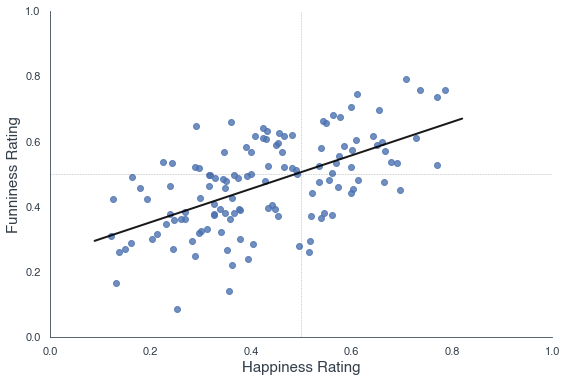

                            OLS Regression Results                            
Dep. Variable:              funnymean   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     64.78
Date:                Tue, 05 May 2020   Prob (F-statistic):           5.35e-13
Time:                        08:59:11   Log-Likelihood:                 97.273
No. Observations:                 128   AIC:                            -190.5
Df Residuals:                     126   BIC:                            -184.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
happymean      0.5121      0.064      8.049      0.0

In [16]:
fig, ax = plt.subplots(figsize = (9,6))


sns.regplot(x = 'happymean', y = 'funnymean', ci = None, data = df_pca, line_kws = {'color': 'k', 'alpha': 0.9,'lw': 2})
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.vlines(x=0.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=0.5, alpha = 0.3)
plt.hlines(y=0.5, xmin=0, xmax=1, color='black', linestyle='--', linewidth=0.5, alpha = 0.3)
[ax.spines[loc].set_visible(False) for loc in ['top', 'right']]
ax.set_ylabel('Funniness Rating', fontsize = 15, fontweight='black', color = '#333F4B')
ax.set_xlabel('Happiness Rating', fontsize = 15, fontweight='black', color = '#333F4B')
#plt.savefig('Fun_hap_corr.svg', dpi = 1200, format = 'svg')
plt.show()

#Fit a linear Regression
linReg(df_pca, 'funnymean', 'happymean')


##### Again we see, that with rising happy rating, the mean funniness also rises. This time, however, we can see, that quite a few unhappy scenes, are rated as funny. We suspected them to belong to the Schadenfreude category. 

##### Now to the last part of this analysis. We intended to find relevant properties, a funny scene should possess. Our analysis yielded two predictors. The scene has to be a violation of some sort and should concern a happy object. Now, we want to see how good our ratings are in predicting if a scene is more likely to be perceived as funny than not. Therefore, we first turn the funniness ratings into binary form. As a cut-off we choose 0.5. 

##### Then we fit our model. Due to the binary coding, we choose a logistic regression. This has the advantage, that we can easily visualize and interpret the finding.

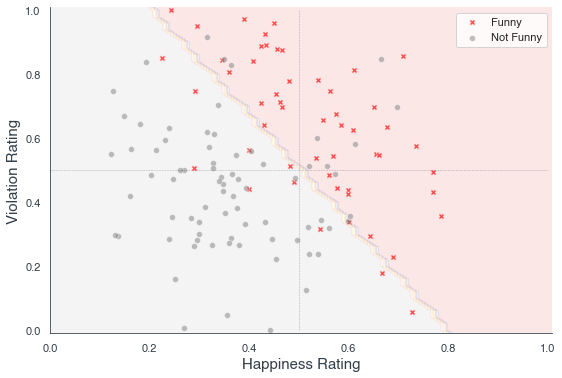

Cross_val_score: 0.8375816993464053
Test Score: 0.7906976744186046


In [17]:
#Turn the funny ratings into binary
def fun(row):
    if (row['funnymean'] >= 0.5):
        return 1
    if (row['funnymean'] < 0.5):
        return 0

df_pca['fun'] = df_pca.apply(fun, axis = 1)

#prepare the factors
bvt = df_pca.copy()
X = bvt[['happymean', 'violation']]
y = bvt.fun

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

#Fit the model:
logreg = LogisticRegression(C = 30, multi_class = 'multinomial', solver = 'lbfgs')
logreg.fit(X_train, y_train)

cross = cross_val_score(logreg, X_train, y_train, cv=5)




#For Visualization we use the whole data.
logreg2 = LogisticRegression(C = 30, multi_class = 'multinomial', solver = 'lbfgs')
logreg2.fit(X, y)

x_min, x_max = X['happymean'].min() - .5, X['happymean'].max() + .5
y_min, y_max = X['violation'].min() - .5, X['violation'].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize = (9,6))
ax.contourf(xx, yy, Z, cmap = 'Set1_r', alpha = 0.1)

# Plot also the training points
sns.scatterplot(x = bvt[(bvt['fun'] == 1)]['happymean'], y = bvt[(bvt['fun'] == 1)]['violation'],
                marker = 'X',
                label = 'Funny',
                color = 'red', 
                alpha = 0.7
               )

sns.scatterplot(x = bvt[(bvt['fun'] == 0)]['happymean'], y = bvt[(bvt['fun'] == 0)]['violation'], 
                marker = 'o', 
                label = 'Not Funny', 
                color = 'grey', 
                alpha = 0.5
               )

#Improve the appearance
plt.xlim(0, 1.01)
plt.ylim(-0.01, 1.01)
[ax.spines[loc].set_visible(False) for loc in ['top', 'right']]
plt.vlines(x=0.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=0.5, alpha = 0.3)
plt.hlines(y=0.5, xmin=0, xmax=1, color='black', linestyle='--', linewidth=0.5, alpha = 0.3)
ax.set_ylabel('Violation Rating', fontsize = 15, fontweight='black', color = '#333F4B')
ax.set_xlabel('Happiness Rating', fontsize = 15, fontweight='black', color = '#333F4B')
#plt.savefig('Log.svg', dpi = 1200, format = 'svg')
plt.show()


print('Cross_val_score:', cross.mean())
print('Test Score:', logreg.score(X_test, y_test))

##### We can see, that our model could correctly predict 79% of the test scenes. 
##### Before, we used linear regression on our predictors. To see, if the new model is a better fit, we have to fit logistic regressions to our raw predictors as well. Then we can compare.

Note: We used crossvalidation on our trainingsset to tweak our model. Then, we reported the testset. For the visualization, we used the whole data. 

In [21]:
#Fit a logistic regression to the violation ratings
logreg_viol = LogisticRegression(C=20, solver='lbfgs')
logreg_viol.fit(X_train[['violation']], y_train)

#Use cross validation to tweak it
cross = cross_val_score(logreg_viol, X_train[['violation']], y_train, cv=5)
cross.mean()



#Fit a logistic regression to the happiness ratings
logreg_hap = LogisticRegression(C=5, solver='lbfgs')
logreg_hap.fit(X_train[['happymean']], y_train)

#Use cross validation to tweak it
cross = cross_val_score(logreg_hap, X_train[['happymean']], y_train, cv=5)
cross.mean()



#Finally compare the models:
print('Just violation: {:0.3}'.format(logreg_viol.score(X_test[['violation']], y_test)))
print('Just happy: {:0.3}'.format(logreg_hap.score(X_test[['happymean']], y_test)))
print('Combined model: {:0.3}'.format(logreg.score(X_test, y_test)))

Just violation: 0.744
Just happy: 0.581
Combined model: 0.791


##### We can see, that the new model provides additional information and a better fit for our data. 

#### With this, we conclude this notebook. Thank you for you time and have a good day!